# Web Scraping Assessment by Yeury De los Santos

I am using Python with BeautifulSoup to scrape **daft.ie** a well-known website for real-state adverstisement, in November 2022 when I am doing the scraping the website holds more than 3,000 listings in the buy sub-url.

In this project I resolve the following items.

1. Where in Dublin is it the most / least expensive to buy a property?
2. Identify and implement cleaning techniques to store specific data.
3. Analize the data with statistic functions such as mean, median, count.
4. Create a linear regression function and generate prediction of 'PRICE' for a given floor-area (sqt meter)
5. Gnerate a csv file with the data extracted.
6. Develope another version of the code in a different paradigm (in Python I use function, and I also used Java for OOP)

The code is comented correctly so it would be easier to know what's happening in each line.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [65]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [66]:
url = 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=0'

data = urlopen(url)

In [67]:
# Making sure the request to url is authorized, a 200 response code means granted.
response = requests.get(url)
print(response)

<Response [200]>


In [68]:
soup_dataset = BeautifulSoup(data, 'lxml')

In [69]:
# Getting title.
title = soup_dataset.title.text
print(title)

Property for Sale in Dublin City | Daft.ie


In [70]:
# By analysing the html structure I have identified that within this attribute there is the data I want to scrape.
soup_dataset.find_all(attrs={"data-testid": "title-block"})

[<div data-testid="title-block"><div class="TitleBlock__Price-sc-1avkvav-4 hiFkJc" data-testid="price"><span class="TitleBlock__StyledSpan-sc-1avkvav-5 fKAzIL">€3,000,000<!-- --> </span></div><p class="TitleBlock__Address-sc-1avkvav-8 dzihyY" data-testid="address">7 Henrietta Street, Dublin 1</p><div class="TitleBlock__CardInfo-sc-1avkvav-10 iCjViR" data-testid="card-info"><p class="TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur" data-testid="beds">6 Bed</p><p class="TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur" data-testid="baths">7 Bath</p><p class="TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur" data-testid="floor-area">763 m²</p><p class="TitleBlock__CardInfoItem-sc-1avkvav-9 cKZZql" data-testid="property-type">Terrace</p><div class="TitleBlock__BerContainer-sc-1avkvav-11 iXTpuT"><img alt="" class="TitleBlock__Ber-sc-1avkvav-7 iDkita" data-testid="ber-image" src="https://hermes.daft.ie/dsch-daft-frontend/0.1.1967/static/images/ber/SI_666.svg"/></div></div><div class="TitleBlock__CardEx

In [71]:
# Number of listings.
len(soup_dataset.find_all(attrs={"data-testid": "title-block"}))

20

Up to this point I am only getting 20 items, only the items in page 1.

Let's get all the items in every page.

In [72]:
# Identifying the number of properties currently listed to use that number in a loop as the limit (length).
for unformatted_number in soup_dataset.find_all('h1', class_ = 'styles__SearchH1-sc-1t5gb6v-3 guZHZl'):   
    numbers_of_listings = str(unformatted_number.get_text())
total_str = numbers_of_listings[0:5].replace(',','')
listings = int(total_str)
print(listings)

3794


In [10]:
# Getting the data and creating dictionary (unclean data).
'''
every_property = []

def scraping_pages(url):    
    
    data = urlopen(url)
    soup_dataset = BeautifulSoup(data, 'lxml')
    
    lower_tag = soup_dataset.find_all('p',attrs={"data-testid": "floor-area"})
    
    for oi in lower_tag:
        if oi.parent:
            dictionary = {'ADDRESS':oi.parent.parent.find('p').get_text(), 
                          #'DISTRICT':district, 
                          'AREA':oi.parent.find(attrs={"data-testid": "floor-area"}).get_text(), 
                          'PRICE':oi.parent.parent.find('div', class_ = 'TitleBlock__Price-sc-1avkvav-4 hiFkJc').get_text(), 
                          'AGENT':oi.parent.next_sibling.text
                         }
        every_property.append(dictionary)        
    return
'''

'\nevery_property = []\n\ndef scraping_pages(url):    \n    \n    data = urlopen(url)\n    soup_dataset = BeautifulSoup(data, \'lxml\')\n    \n    lower_tag = soup_dataset.find_all(\'p\',attrs={"data-testid": "floor-area"})\n    \n    for oi in lower_tag:\n        if oi.parent:\n            dictionary = {\'ADDRESS\':oi.parent.parent.find(\'p\').get_text(), \n                          #\'DISTRICT\':district, \n                          \'AREA\':oi.parent.find(attrs={"data-testid": "floor-area"}).get_text(), \n                          \'PRICE\':oi.parent.parent.find(\'div\', class_ = \'TitleBlock__Price-sc-1avkvav-4 hiFkJc\').get_text(), \n                          \'AGENT\':oi.parent.next_sibling.text\n                         }\n        every_property.append(dictionary)        \n    return\n'

In [11]:
#print(every_property)

In [12]:
# Getting the data and creating individual lists to clean the data.
address = []
area = []
price = []

def scraping_pages(url):    
    
    data = urlopen(url)
    soup_dataset = BeautifulSoup(data, 'lxml')
    
    lower_tag = soup_dataset.find_all('p',attrs={"data-testid": "floor-area"})
    
    for oi in lower_tag:
        if oi.parent: # Making that only items with 'floor-area' attribute get shortlisted.
            address.append(oi.parent.parent.find('p').get_text())
            # Cleaning the area list for better to handling
            area.append((oi.parent.find(attrs={"data-testid": "floor-area"}).get_text()))
            price.append(oi.parent.parent.find('div', class_ = 'TitleBlock__Price-sc-1avkvav-4 hiFkJc').get_text())
            
    return

In [13]:
links = []

size = 20
for x_item in range(0,listings,20): # Use the variable 'listings' instead of 'size' to get the data from every page.
    url = f'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from={x_item}'
    links.append(url)
    scraping_pages(url)

In [14]:
# Let's check what url(s) were generated in each loop.
links

['https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=0',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=20',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=40',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=60',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=80',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=100',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=120',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=140',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=160',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=180',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=200',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=220',
 'https://www.daft.ie/property-for-sale/dublin-city?pageSize=20&from=240',
 'https://www.daft.ie/property-

In [15]:
# These are the number of pages.
np.count_nonzero(links)

191

In [16]:
# Quick look on the data.
data = {'ADDRESS':address,'AREA':area, 'PRICE':price}
pd.DataFrame(data)

,ADDRESS,AREA,PRICE
0,"7 Henrietta Street, Dublin 1",763 m²,"€3,000,000"
1,"Drumleck House, Ceanchor Road, Howth, Dublin 13",781 m²,"€10,000,000"
2,"13 Inverness Road, Fairview, Fairview, Dublin 3",200 m²,"€875,000"
3,"3 Ballymun Road, Glasnevin, Dublin 9",152 m²,"€895,000"
4,"Apartment 133, Block F, Bellevue, Islandbridge...",48 m²,"€270,000"
...,...,...,...
3276,"31 Boden Heath, Ballyboden Way, Rathfarnham, D...",6 m²,Price on Application
3277,"38 Melville Park, Finglas, Dublin 11",117 m²,"€289,950"
3278,"18 The Glade, Hunters Run, Clonee, Dublin 15",110 m²,"€350,000"
3279,"6 Rathmore Avenue, Tyrellstown, Tyrrelstown, D...",100 m²,"€340,000"


In [17]:
# Cleaning the address list.
string = ''
address_ = []

rty = 0

for ad in address:
    rty = ad.rfind(',')
    address_.append(ad[:rty]) # New list of address (clean).

In [18]:
# Creating a new list (DISTRICT)
string = ''
district = []

rty = 0

for ad in address:
    rty = ad.rfind(',')
    string = ad[rty:len(ad)].replace(', ','') # Taking the last part of the strings (District) in address to create a new column called 'DISTRICT'.
    if string.startswith('Dublin') == False: 
        string = np.NaN # Identifying those 'Co. Dublin' and changing to nan as I only want districts per se, then I will remove these nan from the dataframe.
        #print(string)
    else:
        print(string) # Values we want to see in our dataframe.
    district.append(string)

Dublin 1
Dublin 13
Dublin 3
Dublin 9
Dublin 8
Dublin 22
Dublin 6
Dublin 6
Dublin 15
Dublin 8
Dublin 18
Dublin 15
Dublin 18
Dublin 3
Dublin 6
Dublin 18
Dublin 11
Dublin 8
Dublin 15
Dublin 15
Dublin 18
Dublin 15
Dublin 8
Dublin 4
Dublin 9
Dublin 14
Dublin 11
Dublin 4
Dublin 20
Dublin 4
Dublin 6
Dublin 2
Dublin 6
Dublin 12
Dublin 18
Dublin 4
Dublin 3
Dublin 4
Dublin 18
Dublin 18
Dublin 5
Dublin 13
Dublin 5
Dublin 3
Dublin 18
Dublin 3
Dublin 3
Dublin 8
Dublin 13
Dublin 13
Dublin 15
Dublin 4
Dublin 24
Dublin 11
Dublin 4
Dublin 14
Dublin 8
Dublin 14
Dublin 24
Dublin 18
Dublin 4
Dublin 2
Dublin 18
Dublin 9
Dublin 7
Dublin 6
Dublin 9
Dublin 9
Dublin 13
Dublin 8
Dublin 14
Dublin 5
Dublin 7
Dublin 16
Dublin 7
Dublin 5
Dublin 18
Dublin 4
Dublin 14
Dublin 4
Dublin 10
Dublin 14
Dublin 16
Dublin 14
Dublin 16
Dublin 24
Dublin 4
Dublin 8
Dublin 15
Dublin 12
Dublin 18
Dublin 3
Dublin 13
Dublin 14
Dublin 10
Dublin 14
Dublin 4
Dublin 15
Dublin 3
Dublin 24
Dublin 8
Dublin 14
Dublin 5
Dublin 8
Dublin 8
Dub

In [19]:
district # We have successfully turn the values we do not need into NaN.

['Dublin 1',
 'Dublin 13',
 'Dublin 3',
 'Dublin 9',
 'Dublin 8',
 'Dublin 22',
 nan,
 'Dublin 6',
 'Dublin 6',
 'Dublin 15',
 'Dublin 8',
 'Dublin 18',
 'Dublin 15',
 'Dublin 18',
 'Dublin 3',
 nan,
 'Dublin 6',
 'Dublin 18',
 'Dublin 11',
 'Dublin 8',
 'Dublin 15',
 'Dublin 15',
 'Dublin 18',
 'Dublin 15',
 'Dublin 8',
 'Dublin 4',
 'Dublin 9',
 'Dublin 14',
 nan,
 nan,
 'Dublin 11',
 'Dublin 4',
 'Dublin 20',
 'Dublin 4',
 'Dublin 6',
 'Dublin 2',
 'Dublin 6',
 'Dublin 12',
 'Dublin 18',
 'Dublin 4',
 'Dublin 3',
 nan,
 'Dublin 4',
 'Dublin 18',
 'Dublin 18',
 'Dublin 5',
 nan,
 'Dublin 13',
 nan,
 'Dublin 5',
 'Dublin 3',
 'Dublin 18',
 'Dublin 3',
 'Dublin 3',
 'Dublin 8',
 'Dublin 13',
 'Dublin 13',
 'Dublin 15',
 nan,
 'Dublin 4',
 'Dublin 24',
 'Dublin 11',
 'Dublin 4',
 nan,
 'Dublin 14',
 'Dublin 8',
 nan,
 'Dublin 14',
 'Dublin 24',
 'Dublin 18',
 'Dublin 4',
 nan,
 'Dublin 2',
 'Dublin 18',
 'Dublin 9',
 'Dublin 7',
 'Dublin 6',
 'Dublin 9',
 'Dublin 9',
 'Dublin 13',
 'Dub

In [20]:
# Cleaning the price list.

price_str = ''
price_int = 0
price_ = []

for pr in price:
    price_str = pr.replace('€','').replace(',','').rstrip() # Removing euro symbol and comas and end space.
    if ' ' in price_str:
        #print(price_str) # to check those other district we do not need.
        price_str = np.NaN # Identifying those values alphanumeric values and changing them to nan then I will remove these nan from the dataframe.
    else:
        #print(type(price_str)) # Here I check price values are str.
        price_str = int(price_str)
        #print(type(price_str)) # Here I check price values have changed to integers.
    price_.append(price_str)
price_

[3000000,
 10000000,
 875000,
 895000,
 270000,
 245000,
 575000,
 995000,
 1475000,
 235000,
 545000,
 585000,
 1495000,
 475000,
 2495000,
 875000,
 1695000,
 585000,
 365000,
 345000,
 375000,
 495000,
 250000,
 330000,
 475000,
 6750000,
 415000,
 450000,
 975000,
 2800000,
 650000,
 945000,
 350000,
 3950000,
 545000,
 1895000,
 385000,
 360000,
 360000,
 975000,
 795000,
 395000,
 435000,
 395000,
 1495000,
 595000,
 1150000,
 950000,
 2500000,
 575000,
 930000,
 450000,
 285000,
 895000,
 295000,
 350000,
 895000,
 475000,
 1170000,
 nan,
 240000,
 400000,
 1700000,
 895000,
 975000,
 735000,
 875000,
 1100000,
 280000,
 395000,
 795000,
 1250000,
 590000,
 4600000,
 399000,
 595000,
 425000,
 445000,
 370000,
 995000,
 599000,
 925000,
 725000,
 3500000,
 545000,
 760000,
 2475000,
 305000,
 345000,
 395000,
 325000,
 715000,
 475000,
 365000,
 260000,
 495000,
 395000,
 795000,
 475000,
 625000,
 225000,
 295000,
 245000,
 215000,
 325000,
 1395000,
 645000,
 315000,
 2000000,

In [21]:
# By looking at the data I saw there was some 'floor area' with a incorrect value, less than 1 sqm, I turned this cells into nan.

# Cleaning the area list - I will only get areas equal or greater than 30 sqm.
area_ = []
area_str = ''

for sq in area:
    area_str = sq.replace(' m²','').replace(' ac','') # Removing symbols.
    area_float = float(area_str)
    
    if area_float < 30.0:
        #print(area_float) # to check those values we do not need.
        area_float = np.NaN
    else:
        area_float = int(area_float)

    area_.append(area_float)
area_

[763,
 781,
 200,
 152,
 48,
 60,
 72,
 143,
 265,
 71,
 100,
 121,
 286,
 120,
 286,
 154,
 255,
 132,
 110,
 69,
 96,
 185,
 45,
 106,
 75,
 595,
 87,
 80,
 210,
 341,
 134,
 146,
 99,
 520,
 71,
 186,
 60,
 94,
 65,
 115,
 155,
 107,
 64,
 77,
 233,
 146,
 260,
 231,
 561,
 124,
 126,
 87,
 48,
 135,
 45,
 102,
 180,
 118,
 220,
 223,
 87,
 92,
 161,
 140,
 175,
 90,
 163,
 170,
 69,
 76,
 170,
 162,
 97,
 539,
 100,
 110,
 54,
 96,
 89,
 239,
 125,
 152,
 161,
 385,
 176,
 249,
 368,
 62,
 102,
 77,
 60,
 144,
 84,
 61,
 81,
 83,
 80,
 131,
 97,
 134,
 58,
 40,
 39,
 54,
 100,
 264,
 102,
 42,
 435,
 116,
 80,
 129,
 64,
 133,
 112,
 102,
 67,
 60,
 79,
 96,
 105,
 95,
 120,
 101,
 nan,
 65,
 90,
 69,
 137,
 92,
 90,
 65,
 94,
 120,
 86,
 63,
 149,
 84,
 175,
 46,
 120,
 72,
 96,
 105,
 172,
 77,
 179,
 122,
 103,
 45,
 313,
 85,
 76,
 66,
 101,
 72,
 167,
 115,
 95,
 37,
 114,
 77,
 79,
 101,
 126,
 140,
 88,
 61,
 90,
 44,
 100,
 50,
 115,
 48,
 73,
 64,
 83,
 112,
 57,
 75,
 40,

In [22]:
# Quick look on the data.
data = {'ADDRESS':address_, 'DISTRICT':district, 'AREA':area_, 'PRICE':price_}
pd.DataFrame(data)

,ADDRESS,DISTRICT,AREA,PRICE
0,7 Henrietta Street,Dublin 1,763.0,3000000.0
1,"Drumleck House, Ceanchor Road, Howth",Dublin 13,781.0,10000000.0
2,"13 Inverness Road, Fairview, Fairview",Dublin 3,200.0,875000.0
3,"3 Ballymun Road, Glasnevin",Dublin 9,152.0,895000.0
4,"Apartment 133, Block F, Bellevue, Islandbridge",Dublin 8,48.0,270000.0
...,...,...,...,...
3276,"31 Boden Heath, Ballyboden Way, Rathfarnham",Dublin 14,NaN,NaN
3277,"38 Melville Park, Finglas",Dublin 11,117.0,289950.0
3278,"18 The Glade, Hunters Run, Clonee",Dublin 15,110.0,350000.0
3279,"6 Rathmore Avenue, Tyrellstown, Tyrrelstown",Dublin 15,100.0,340000.0


Now that we have converted to NaN the values we do not want, we can remove those rows from the dataframe.

In [23]:
df = pd.DataFrame(data)

In [24]:
# Displaying the information of all columns in the dataframe, the difference in non-null is because there are some nan values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281 entries, 0 to 3280
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ADDRESS   3281 non-null   object 
 1   DISTRICT  2816 non-null   object 
 2   AREA      3248 non-null   float64
 3   PRICE     3223 non-null   float64
dtypes: float64(2), object(2)
memory usage: 102.7+ KB


In [25]:
# Removings cells with nan values.
df.dropna(inplace=True) # Using this argument to make sure our changes persist in the dataframe.
df

,ADDRESS,DISTRICT,AREA,PRICE
0,7 Henrietta Street,Dublin 1,763.0,3000000.0
1,"Drumleck House, Ceanchor Road, Howth",Dublin 13,781.0,10000000.0
2,"13 Inverness Road, Fairview, Fairview",Dublin 3,200.0,875000.0
3,"3 Ballymun Road, Glasnevin",Dublin 9,152.0,895000.0
4,"Apartment 133, Block F, Bellevue, Islandbridge",Dublin 8,48.0,270000.0
...,...,...,...,...
3274,"17 Herbert Park, Ballsbridge",Dublin 4,300.0,2300000.0
3275,16 Healy Street,Dublin 1,60.0,250000.0
3277,"38 Melville Park, Finglas",Dublin 11,117.0,289950.0
3278,"18 The Glade, Hunters Run, Clonee",Dublin 15,110.0,350000.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 3279
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ADDRESS   2736 non-null   object 
 1   DISTRICT  2736 non-null   object 
 2   AREA      2736 non-null   float64
 3   PRICE     2736 non-null   float64
dtypes: float64(2), object(2)
memory usage: 106.9+ KB


You can tell our rows number decreased, now we have no difference in the 'Non-Null column' as we have dropped every nan.

In [27]:
# Creating new list from the clean dataframe.

new_address = df['ADDRESS'].to_list()
new_district = df['DISTRICT'].to_list()
new_area = df['AREA'].to_list()
new_price = df['PRICE'].to_list()

In [77]:
# Calculating the mean value of the column 'AREA'.
area_mean = df['AREA'].mean()
print(area_mean)

108.37733035048471


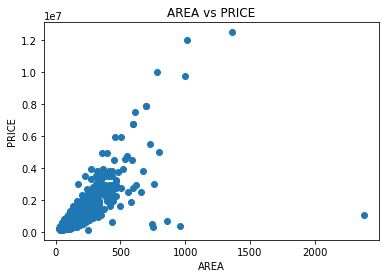

In [29]:
# Create two new arrays with the values in area and in price_.
x = area_
y = price_

# Displaying the plot
plot.scatter(x, y)
plot.xlabel('AREA')
plot.ylabel('PRICE')
plot.title('AREA vs PRICE')
plot.show()

In [30]:
# Creating a new column to storage the mean in price grouped by districts.
df['VALUE X SQM'] = df['PRICE'] / df['AREA']

In [31]:
df

,ADDRESS,DISTRICT,AREA,PRICE,VALUE X SQM
0,7 Henrietta Street,Dublin 1,763.0,3000000.0,3931.847969
1,"Drumleck House, Ceanchor Road, Howth",Dublin 13,781.0,10000000.0,12804.097311
2,"13 Inverness Road, Fairview, Fairview",Dublin 3,200.0,875000.0,4375.000000
3,"3 Ballymun Road, Glasnevin",Dublin 9,152.0,895000.0,5888.157895
4,"Apartment 133, Block F, Bellevue, Islandbridge",Dublin 8,48.0,270000.0,5625.000000
...,...,...,...,...,...
3274,"17 Herbert Park, Ballsbridge",Dublin 4,300.0,2300000.0,7666.666667
3275,16 Healy Street,Dublin 1,60.0,250000.0,4166.666667
3277,"38 Melville Park, Finglas",Dublin 11,117.0,289950.0,2478.205128
3278,"18 The Glade, Hunters Run, Clonee",Dublin 15,110.0,350000.0,3181.818182


In [32]:
# Here I am grouping by 'DISTRICT' AND 'AREA' to identify the average price for each set.
df.groupby(['DISTRICT','AREA'])['PRICE'].agg(['count','mean'])

count       mean
DISTRICT AREA                   
Dublin 1 35.0       1   230000.0
         36.0       1   235000.0
         37.0       2   227500.0
         38.0       1   225000.0
         40.0       2   232500.0
...               ...        ...
Dublin 9 177.0      1  1150000.0
         181.0      1   470000.0
         187.0      1   750000.0
         203.0      1   975000.0
         354.0      1  1100000.0

[1629 rows x 2 columns]

In [33]:
# Now, let's create a new column called 'AREA_BINS' to sub-group/cut floor-area in three categories ().
df['AREA_BINS'] = pd.cut(df['AREA'], bins=3, labels = ('Small','Big','Huge'))

In [34]:
df

,ADDRESS,DISTRICT,AREA,PRICE,VALUE X SQM,AREA_BINS
0,7 Henrietta Street,Dublin 1,763.0,3000000.0,3931.847969,Big
1,"Drumleck House, Ceanchor Road, Howth",Dublin 13,781.0,10000000.0,12804.097311,Big
2,"13 Inverness Road, Fairview, Fairview",Dublin 3,200.0,875000.0,4375.000000,Small
3,"3 Ballymun Road, Glasnevin",Dublin 9,152.0,895000.0,5888.157895,Small
4,"Apartment 133, Block F, Bellevue, Islandbridge",Dublin 8,48.0,270000.0,5625.000000,Small
...,...,...,...,...,...,...
3274,"17 Herbert Park, Ballsbridge",Dublin 4,300.0,2300000.0,7666.666667,Small
3275,16 Healy Street,Dublin 1,60.0,250000.0,4166.666667,Small
3277,"38 Melville Park, Finglas",Dublin 11,117.0,289950.0,2478.205128,Small
3278,"18 The Glade, Hunters Run, Clonee",Dublin 15,110.0,350000.0,3181.818182,Small


In [35]:
# Now we can group by district and area_bins to check what floor areas group there are in each district.
df.groupby(['DISTRICT','AREA_BINS'])['AREA'].count()

DISTRICT   AREA_BINS
Dublin 1   Small         54
           Big            3
           Huge           0
Dublin 10  Small         19
           Big            0
                       ... 
Dublin 8   Big            1
           Huge           0
Dublin 9   Small        175
           Big            0
           Huge           0
Name: AREA, Length: 66, dtype: int64

In [36]:
df.groupby(['AREA_BINS'])['AREA_BINS'].count()

AREA_BINS
Small    2717
Big        17
Huge        2
Name: AREA_BINS, dtype: int64

In [37]:
# Let's change those Dtype from float64 to int64 instead.
# As I want to change more than one column it's good idea to use dictionary, a strong data structure.
df = df.astype({'AREA': 'int64', 'PRICE':'int64', 'VALUE X SQM': 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 3279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ADDRESS      2736 non-null   object  
 1   DISTRICT     2736 non-null   object  
 2   AREA         2736 non-null   int64   
 3   PRICE        2736 non-null   int64   
 4   VALUE X SQM  2736 non-null   int64   
 5   AREA_BINS    2736 non-null   category
dtypes: category(1), int64(3), object(2)
memory usage: 131.1+ KB


In [38]:
# Let's take a quick look to our data frame to see what else need some caring

In [39]:
# After droping nan one should check indexes, they need to be reset
df = df.reset_index(drop=True)
df # This will show data frame with indexes fixed and according to the data frame length.

,ADDRESS,DISTRICT,AREA,PRICE,VALUE X SQM,AREA_BINS
0,7 Henrietta Street,Dublin 1,763,3000000,3931,Big
1,"Drumleck House, Ceanchor Road, Howth",Dublin 13,781,10000000,12804,Big
2,"13 Inverness Road, Fairview, Fairview",Dublin 3,200,875000,4375,Small
3,"3 Ballymun Road, Glasnevin",Dublin 9,152,895000,5888,Small
4,"Apartment 133, Block F, Bellevue, Islandbridge",Dublin 8,48,270000,5625,Small
...,...,...,...,...,...,...
2731,"17 Herbert Park, Ballsbridge",Dublin 4,300,2300000,7666,Small
2732,16 Healy Street,Dublin 1,60,250000,4166,Small
2733,"38 Melville Park, Finglas",Dublin 11,117,289950,2478,Small
2734,"18 The Glade, Hunters Run, Clonee",Dublin 15,110,350000,3181,Small


In [40]:
# Most expensive property.

current_max_area = new_area[0]
current_max_price = new_price[0]
current_max_address = new_address[0]


for n in range(0,len(new_price)):
    if new_price[n] > current_max_price:
        current_max_area = new_area[n]
        current_max_address = new_address[n]
        current_max_price = new_price[n]
        
print('Floor area: ' + str(current_max_area)+' sq m \n' + 'Located at: ' + str(current_max_address)+'\n' + 'Value: ' + str(current_max_price))

Floor area: 1365.0 sq m 
Located at: Censure House, Ceanchor Road, Howth
Value: 12500000.0


In [41]:
# Least expensive property.

current_min_area = new_area[0]
current_min_price = new_price[0]
current_min_address = new_address[0]


for n in range(0,len(new_price)):
    if new_price[n] < current_min_price:
        current_min_area = new_area[n]
        current_min_address = new_address[n]
        current_min_price = new_price[n]
        
print('Floor area: ' + str(current_min_area)+' sq m \n' + 'Located at: ' + str(current_min_address)+'\n' + 'Value: ' + str(current_min_price))

Floor area: 61.0 sq m 
Located at: Apartment 97, Block B, Newtown Court, Newtown Court Way, Coolock
Value: 149950.0


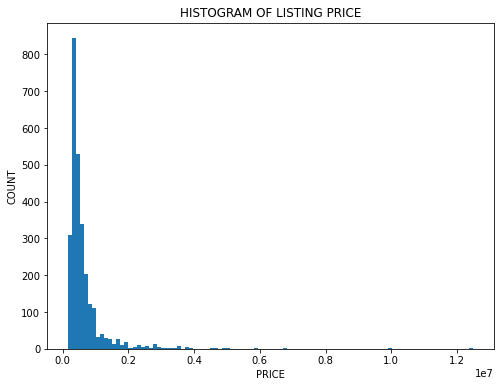

In [42]:
plot.figure(figsize=(8,6))
plot.title('HISTOGRAM OF LISTING PRICE')
plot.xlabel('PRICE')
plot.ylabel('COUNT')
plot.hist(df['PRICE'], bins=100)
plot.show()

I will identify outliers, I will use zscore and take into consideration only prices within 3 standard deviation points.

In [43]:
df.PRICE.mean()

620889.3252923976

In [44]:
df.PRICE.std()

640664.0223398532

In [45]:
# Creating a new column to see the zscore for each row.
df['ZSCORE'] = (df.PRICE - df.PRICE.mean())/df.PRICE.std()
df.head(5)

,ADDRESS,DISTRICT,AREA,PRICE,VALUE X SQM,AREA_BINS,ZSCORE
0,7 Henrietta Street,Dublin 1,763,3000000,3931,Big,3.713508
1,"Drumleck House, Ceanchor Road, Howth",Dublin 13,781,10000000,12804,Big,14.639671
2,"13 Inverness Road, Fairview, Fairview",Dublin 3,200,875000,4375,Small,0.396636
3,"3 Ballymun Road, Glasnevin",Dublin 9,152,895000,5888,Small,0.427854
4,"Apartment 133, Block F, Bellevue, Islandbridge",Dublin 8,48,270000,5625,Small,-0.547696


In [46]:
# Let's identify every outlier
outliers = []

def outliers_def(dataset):
    
    threshold = 3
    mean = np.mean(dataset)
    std = np.std(dataset)
    
    for x in dataset:
        zscore = (x-mean)/std # This is the 'Zscore' formula right here.
        if np.abs(zscore) > threshold:
            outliers.append(x)
    return outliers

In [47]:
outlier = outliers_def(new_price)

In [48]:
print('Outliers: \n' + str(np.count_nonzero(outlier))) # How many outliers were identified.
df[df['ZSCORE'] > 3] # Printing data frame filtered by outliers.

Outliers: 
54


,ADDRESS,DISTRICT,AREA,PRICE,VALUE X SQM,AREA_BINS,ZSCORE
0,7 Henrietta Street,Dublin 1,763,3000000,3931,Big,3.713508
1,"Drumleck House, Ceanchor Road, Howth",Dublin 13,781,10000000,12804,Big,14.639671
23,"Dungriffan, 2 Sydney Parade Avenue",Dublin 4,595,6750000,11344,Big,9.566810
29,"106 Merrion Road Ballsbridge Dublin 4, Ballsbr...",Dublin 4,520,3950000,7596,Big,5.196344
61,"Baile An Mhota, Kerrymount Avenue, Foxrock",Dublin 18,539,4600000,8534,Big,6.210916
654,"Belmont House, Stoney Road Dundrum Dublin 14, ...",Dublin 14,432,2950000,6828,Small,3.635464
742,"Speranza, 75 Leeson Street Upper",Dublin 4,381,3500000,9186,Small,4.493948
794,"Serena, Brighton Road Foxrock Dublin 18, Foxrock",Dublin 18,435,3500000,8045,Small,4.493948
995,"3 Shrewsbury Gardens, Ballsbridge",Dublin 4,368,3750000,10190,Small,4.884168
1067,"Residential Investment, Dartry",Dublin 6,470,3200000,6808,Small,4.025684


In [49]:
df = df[(df.ZSCORE > - 3) & (df.ZSCORE < 3)] # We have to also consider the values under the threshold because those just mean are lower than the mean wich is ideally.
df = df.reset_index(drop=True)
df

,ADDRESS,DISTRICT,AREA,PRICE,VALUE X SQM,AREA_BINS,ZSCORE
0,"13 Inverness Road, Fairview, Fairview",Dublin 3,200,875000,4375,Small,0.396636
1,"3 Ballymun Road, Glasnevin",Dublin 9,152,895000,5888,Small,0.427854
2,"Apartment 133, Block F, Bellevue, Islandbridge",Dublin 8,48,270000,5625,Small,-0.547696
3,"4 Newlands Manor Drive, Clondalkin, Clondalkin",Dublin 22,60,245000,4083,Small,-0.586718
4,"28 Leeson Park Avenue, Ranelagh, Ranelagh",Dublin 6,143,995000,6958,Small,0.583942
...,...,...,...,...,...,...,...
2677,"17 Herbert Park, Ballsbridge",Dublin 4,300,2300000,7666,Small,2.620891
2678,16 Healy Street,Dublin 1,60,250000,4166,Small,-0.578914
2679,"38 Melville Park, Finglas",Dublin 11,117,289950,2478,Small,-0.516557
2680,"18 The Glade, Hunters Run, Clonee",Dublin 15,110,350000,3181,Small,-0.422826


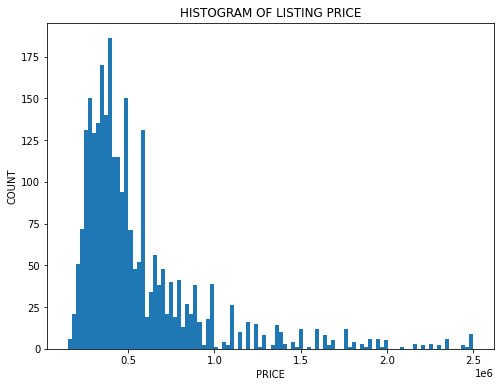

In [50]:
plot.figure(figsize=(8,6))
plot.title('HISTOGRAM OF LISTING PRICE')
plot.xlabel('PRICE')
plot.ylabel('COUNT')
plot.hist(df['PRICE'], bins=100)
plot.show()

In [51]:
# Exporting the dataset to a csv file
df.to_csv('daft.csv')

# Algorithms & Mathematical Methods

From my dataset I will analyse the variables 'AREA' and 'PRICE' in a function y=mx+b
and then train a machine learning model to run some predictions of price based on the floor-area provided.

In [52]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regression = linear_model.LinearRegression()

# Training my model
regression.fit(df[['AREA']],df.PRICE)

LinearRegression()

In [53]:
# Identifying m (slope or coeficient)
regression.coef_

array([4819.75628588])

In [54]:
# Identifying interception (y(interception) which is b in our function y=mx+b)
regression.intercept_

32924.78519573936

In [55]:
# The value we want to predict (price) is our 'y' and the area is 'x'
# price = m * area + b

m = regression.coef_
b = regression.intercept_
x_ = 95 # 'area' argument

In [56]:
# Our formula
int(m*x_+b)

490801

In [57]:
# Let's see if our model is predicting the right price
regression.predict([[x_]])

array([490801.63235462])

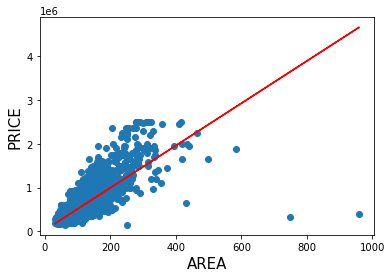

In [58]:
# Scatter plot
plot.xlabel('AREA', fontsize=15)
plot.ylabel('PRICE', fontsize=15)
plot.scatter(df.AREA, df.PRICE)

# Scatter with regression
plot.plot(df.AREA, regression.predict(df[['AREA']]),'r')

In [59]:
# Let's check how accurate is the prediction, 1 equals perfect prediction.
actual_price = df['PRICE']
predicted_price = regression.predict(df[['AREA']]).astype('int64')

In [60]:
print(actual_price)

0        875000
1        895000
2        270000
3        245000
4        995000
         ...   
2677    2300000
2678     250000
2679     289950
2680     350000
2681     340000
Name: PRICE, Length: 2682, dtype: int64


In [61]:
print(predicted_price)

[996876 765527 264273 ... 596836 563097 514900]


In [62]:
print('Coefficient of determination: %.2f' % r2_score(actual_price, predicted_price))

Coefficient of determination: 0.60


# References:

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/multiple-regression/

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

https://www.crummy.com/software/BeautifulSoup/bs4/doc/